<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/HACKATON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import itertools
import time
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier



In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Sleep_Data_1 (1).csv')
data.shape #(768,9)


(2955, 5)

In [ ]:
data

,Start,End,Duration (hr),Value,Source
0,2023-02-13 23:21:07,2023-02-14 08:47:48,9.440,InBed,NHC
1,2023-02-13 23:50:25,2023-02-14 00:07:25,0.283,Core,Sujeong의 Apple Watch
2,2023-02-14 00:07:25,2023-02-14 00:27:25,0.333,Deep,Sujeong의 Apple Watch
3,2023-02-14 00:27:25,2023-02-14 00:30:25,0.050,Core,Sujeong의 Apple Watch
4,2023-02-14 00:30:25,2023-02-14 00:38:25,0.133,Deep,Sujeong의 Apple Watch
...,...,...,...,...,...
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,0.417,REM,Sujeong의 Apple Watch
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,0.333,Core,Sujeong의 Apple Watch
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,0.017,Awake,Sujeong의 Apple Watch
2953,2023-05-03 07:30:05,2023-05-03 07:31:05,0.017,Core,Sujeong의 Apple Watch


In [ ]:
InBed = data[data["Value"]=='InBed']
NHC = InBed[InBed["Source"] == 'NHC']

Watch = data[data["Source"] != 'NHC']
Watch = Watch[Watch['Value'] != "InBed"]

In [ ]:
Watch['Start'] = pd.to_datetime(Watch['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Watch['End'] = pd.to_datetime(Watch['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
# duration, Source 삭제
watch_drop=Watch.drop(columns=['Duration (hr)', 'Source']) 

In [ ]:
Watch.columns

Index(['Start', 'End', 'Duration (hr)', 'Value', 'Source'], dtype='object')

In [ ]:
watch_drop['Value']= watch_drop['Value'].replace('Core',2)
watch_drop['Value']= watch_drop['Value'].replace('REM',3)
watch_drop['Value']= watch_drop['Value'].replace('Deep',1)
watch_drop['Value']= watch_drop['Value'].replace('Awake',4)

In [ ]:
watch_drop

,Start,End,Value
1,2023-02-13 23:50:25,2023-02-14 00:07:25,2
2,2023-02-14 00:07:25,2023-02-14 00:27:25,1
3,2023-02-14 00:27:25,2023-02-14 00:30:25,2
4,2023-02-14 00:30:25,2023-02-14 00:38:25,1
5,2023-02-14 00:38:25,2023-02-14 00:39:55,2
...,...,...,...
2948,2023-05-03 06:16:05,2023-05-03 06:44:05,2
2950,2023-05-03 06:44:05,2023-05-03 07:09:05,3
2951,2023-05-03 07:09:05,2023-05-03 07:29:05,2
2952,2023-05-03 07:29:05,2023-05-03 07:30:05,4


In [ ]:
watch_drop.head(45)

,Start,End,Value
1,2023-02-13 23:50:25,2023-02-14 00:07:25,2
2,2023-02-14 00:07:25,2023-02-14 00:27:25,1
3,2023-02-14 00:27:25,2023-02-14 00:30:25,2
4,2023-02-14 00:30:25,2023-02-14 00:38:25,1
5,2023-02-14 00:38:25,2023-02-14 00:39:55,2
6,2023-02-14 00:39:55,2023-02-14 00:40:25,1
7,2023-02-14 00:40:25,2023-02-14 00:46:55,2
8,2023-02-14 00:46:55,2023-02-14 00:55:55,3
9,2023-02-14 00:55:55,2023-02-14 01:21:55,2
10,2023-02-14 01:21:55,2023-02-14 01:35:55,1


In [ ]:
start_date = '2023-02-25 12:00:00'
end_date = '2023-03-26 12:00:00'
first = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]

In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-04-21 12:00:00'
second = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]

In [ ]:
second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1573 to 2580
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Start   786 non-null    datetime64[ns]
 1   End     786 non-null    datetime64[ns]
 2   Value   786 non-null    int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 24.6 KB


In [ ]:
second.head()

,Start,End,Value
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,2
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,4
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,2
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,1
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,2


<Axes: xlabel='Start'>

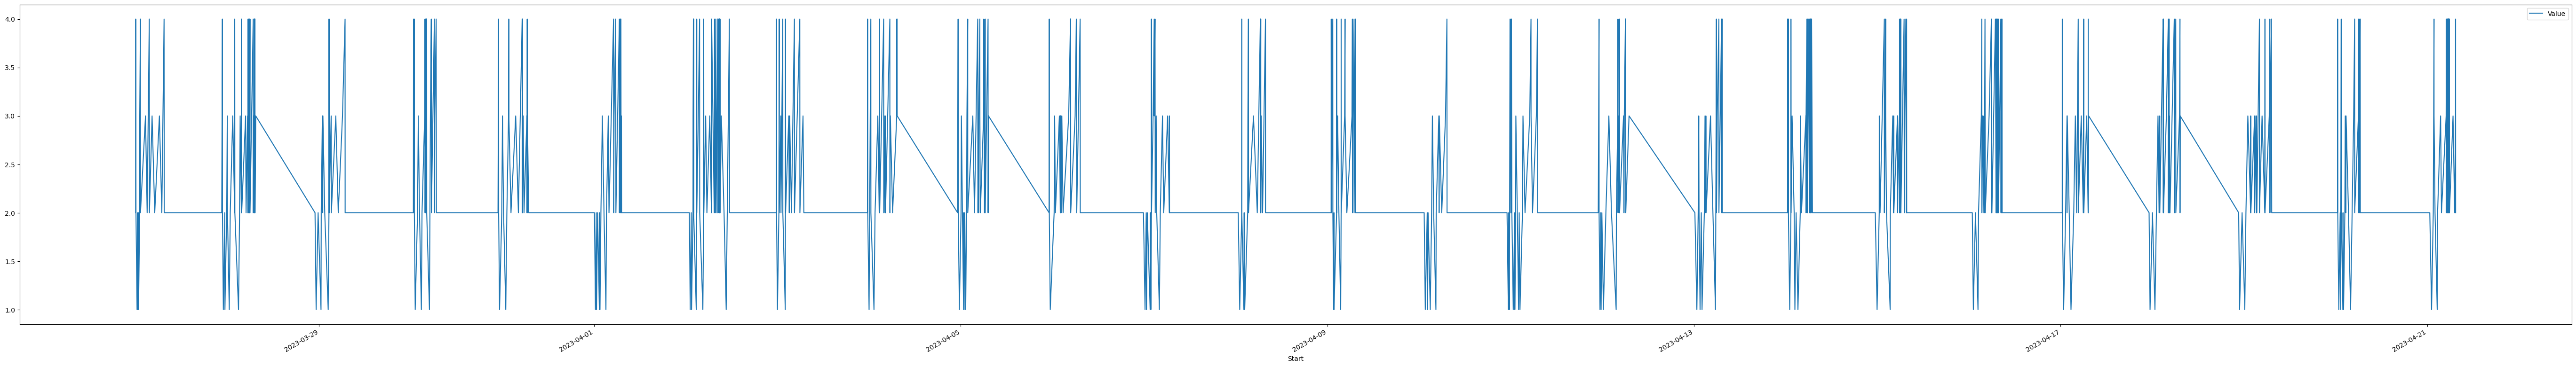

In [ ]:
second.plot(x='Start',y='Value',figsize=(70,10))

<Axes: xlabel='Start'>

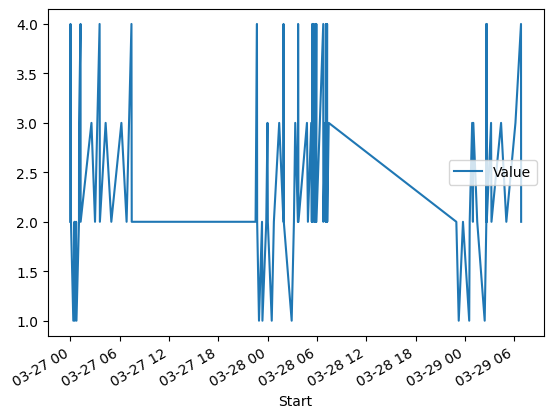

In [ ]:
start_date = '2023-03-26 12:00:00'
end_date = '2023-03-29 12:00:00'
test = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test
test.plot(x='Start',y='Value')

<Axes: xlabel='Start'>

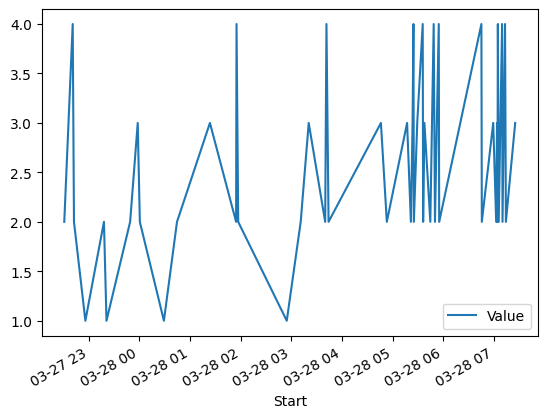

In [ ]:
start_date = '2023-03-27 12:00:00'
end_date = '2023-03-28 12:00:00'
test2 = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test2
test2.plot(x='Start',y='Value')

<Axes: xlabel='Start'>

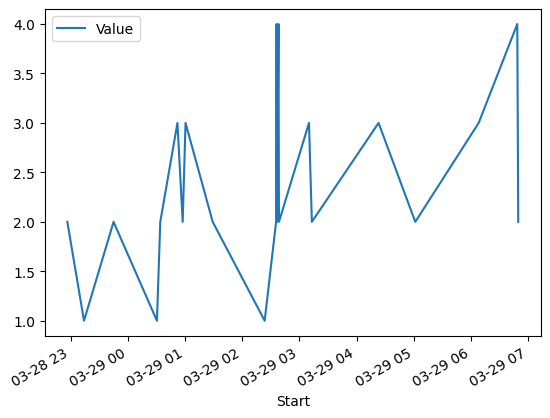

In [ ]:
start_date = '2023-03-28 12:00:00'
end_date = '2023-03-29 12:00:00'
test3 = watch_drop[(watch_drop['Start']>=start_date) & (watch_drop['Start']<=end_date)]
test3
test3.plot(x='Start',y='Value')

<Axes: xlabel='Start', ylabel='Value'>

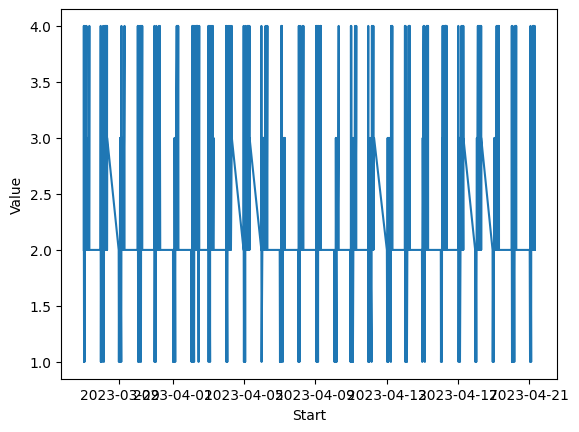

In [ ]:
sns.lineplot(data=second,x='Start',y='Value')

In [ ]:
test['day'] = test['Start'].dt.day

<ipython-input-21-aa7c8016b0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['day'] = test['Start'].dt.day


In [ ]:
test.head(5)

,Start,End,Value,day
1573,2023-03-26 23:58:09,2023-03-27 00:00:09,2,26
1575,2023-03-27 00:00:09,2023-03-27 00:03:39,4,27
1577,2023-03-27 00:03:39,2023-03-27 00:20:39,2,27
1579,2023-03-27 00:20:39,2023-03-27 00:29:09,1,27
1580,2023-03-27 00:29:09,2023-03-27 00:31:09,2,27
